# 4. Train ConvNN Model: Regression Method


In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Prepare the X and y variables to deploy the trained ML models
- Visualize them for few cases

We will need the following modules from `TelescopeML`:

- *DeepBuilder*: to prepare the syntheric brown dwarf dataset, load the trained machine learning (ML) models
- *Predictor*: to prepare the observatinal brown dwarf dataset and deploy the trained ML models
- *StatVisAnalyzer*: provide statistical-test and plotting function  
- *IO_utils*: provide functions to load the trained ML models

In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## 3.1 Data Preperation 

### 3.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v2.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


### 3.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!

In [4]:
target_features = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[target_features].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

training_features_labels = [item for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_labels[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

training_features_wl = [float(item) for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_wl[:5]

[2.512, 2.487, 2.462, 2.438, 2.413]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


### 3.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!


In [8]:
# to assure we are only training the module with the native non-augmented BD training dataset
train_BD = train_BD[train_BD['is_augmented'].isin(['no'])] 


# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 3.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 3.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
trained_Data_Processor = DataProcessor( 
                             feature_values=X.to_numpy(),
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN',
                                )

### 3.2.2 Split the dataset into train, validate and test sets

In [12]:
trained_Data_Processor.split_train_validation_test(test_size=0.1, 
                                                 val_size=0.1, 
                                                 random_state_=100,)

### 3.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
trained_Data_Processor.standardize_X_row_wise()

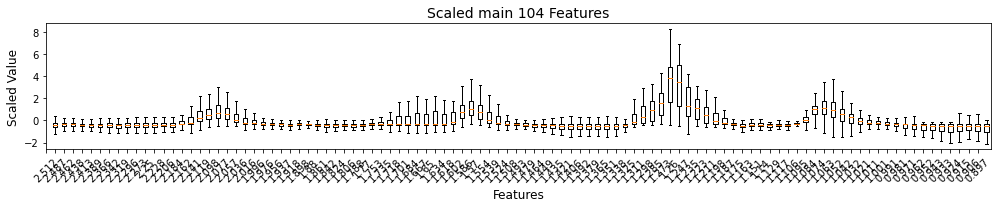

In [14]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_train_standardized_rowwise, 
                                                  xticks_list = training_features_labels,
                                                  title = 'Scaled main 104 Features',
                                                  fig_size=(14, 3),
                                                    )

### 3.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
trained_Data_Processor.standardize_y_column_wise()

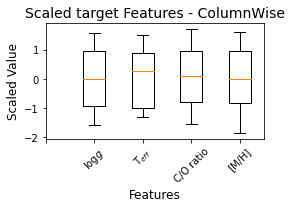

In [16]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.y_train_standardized_columnwise, 
                                                  xticks_list = ['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
                                                  title = 'Scaled target Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

### 3.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
trained_Data_Processor.X_train_min = trained_Data_Processor.X_train.min(axis=1)
trained_Data_Processor.X_train_max = trained_Data_Processor.X_train.max(axis=1)

# validation
trained_Data_Processor.X_val_min = trained_Data_Processor.X_val.min(axis=1)
trained_Data_Processor.X_val_max = trained_Data_Processor.X_val.max(axis=1)

# test
trained_Data_Processor.X_test_min = trained_Data_Processor.X_test.min(axis=1)
trained_Data_Processor.X_test_max = trained_Data_Processor.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((trained_Data_Processor.X_train_min, trained_Data_Processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((trained_Data_Processor.X_val_min, trained_Data_Processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((trained_Data_Processor.X_test_min, trained_Data_Processor.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,2.984493e-18,4.560593e-11
1,6.833671e-15,2.317328e-09
2,2.870361e-14,5.564836e-09
3,5.696652e-19,5.071436e-11
4,1.321553e-10,1.636513e-07


### 3.2.6 Scale Min Max features - ColumnWise

In [21]:
trained_Data_Processor.standardize_X_column_wise(
                                                X_train = df_MinMax_train.to_numpy(),
                                                X_val   = df_MinMax_val.to_numpy(),
                                                X_test  = df_MinMax_test.to_numpy(),
                                                )

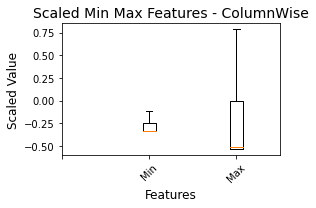

In [22]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_test_standardized_columnwise, 
                                                  xticks_list = ['','Min','Max'],
                                                  title = 'Scaled Min Max Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

## 3.3 Train CNN model

### 3.3.1 Instintiate *TrainRegressorCNN* class from *DeepTrainer* Module

In [23]:
train_cnn_model = TrainRegressorCNN(
            # input dataset: StandardScaled instances  
            X1_train = trained_Data_Processor.X_train_standardized_rowwise,
            X1_val   = trained_Data_Processor.X_val_standardized_rowwise,
            X1_test  = trained_Data_Processor.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = trained_Data_Processor.X_train_standardized_columnwise,
            X2_val   = trained_Data_Processor.X_val_standardized_columnwise,
            X2_test  = trained_Data_Processor.X_test_standardized_columnwise,
#             X2_train = trained_Data_Processor.X_train_normalized_columnwise,
#             X2_val   = trained_Data_Processor.X_val_normalized_columnwise,
#             X2_test  = trained_Data_Processor.X_test_normalized_columnwise,

            # 1st target
            y1_train = trained_Data_Processor.y_train_standardized_columnwise[:,0],
            y1_val   = trained_Data_Processor.y_val_standardized_columnwise[:,0],
            y1_test  = trained_Data_Processor.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = trained_Data_Processor.y_train_standardized_columnwise[:,1],
            y2_val   = trained_Data_Processor.y_val_standardized_columnwise[:,1],
            y2_test  = trained_Data_Processor.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = trained_Data_Processor.y_train_standardized_columnwise[:,2],
            y3_val   = trained_Data_Processor.y_val_standardized_columnwise[:,2],
            y3_test  = trained_Data_Processor.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = trained_Data_Processor.y_train_standardized_columnwise[:,3],
            y4_val   = trained_Data_Processor.y_val_standardized_columnwise[:,3],
            y4_test  = trained_Data_Processor.y_test_standardized_columnwise[:,3],
            )

### 3.3.2 Define the Hyperparameters

In [24]:
hyperparameters = {'Conv__MaxPooling1D': 2,
                 'Conv__num_blocks': 1,
                 'Conv__num_layers_per_block': 3,
                 'Conv__num_filters': 4,
                 'Conv__kernel_size': 6,
                   
                 'FC2__num_blocks': 4,
                 'FC2_num_layers_per_block': 2,
                 'FC__dropout': 0.0024609140719442646,
                 'FC2__dropout': 64,
                 'FC2__units': 64,
#                  'FC__units_gravity': 16,
#                  'FC__units_metallicity': 256,
#                  'FC__units_temperature': 8,
                   
                 'FC1__num_blocks': 1,
                 'FC1_num_layers_per_block': 4,
                 'FC2__dropout': 0.09889223768186726,
                 'FC1__units': 128,
                 'FC1__dropout': 0.002185843015008406,
                   
                 'learning_rate': 4.9946842008422193e-05}

In [25]:
# hyperparameters = {
#      'Conv__MaxPooling1D': 2,
#      'Conv__num_blocks': 1,
#      'Conv__num_layers_per_block': 3,
#      'Conv__num_filters': 4,
#      'Conv__kernel_size': 6,
#      'FC__NumberLayers': 4,
    
#      'FC1__num_blocks' : 1,
#      'FC1_num_layers_per_block': 2,
#      'FC1__dropout': 0.09889223768186726,
#      'FC1__units': 128,

#      'FC2__num_blocks' : 1,
#      'FC2_num_layers_per_block':2,
#      'FC2__dropout': 0.0024609140719442646,
#      'FC2__units': 64,

    
#      'learning_rate': 4.9946842008422193e-05}

### 3.3.3 Build a CNN model

In [26]:
train_cnn_model.build_model(hyperparameters = hyperparameters, 
                     )

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


None


### 3.3.4 Train the CNN model using the datasets

In [27]:
history, model =  train_cnn_model.fit_cnn_model(batch_size=2**11,
                                                budget=4)

Epoch 1/4


 1/13 [=>............................] - ETA: 1:19 - loss: 1.8363 - gravity_loss: 0.4453 - c_o_ratio_loss: 0.4630 - metallicity_loss: 0.4549 - temperature_loss: 0.4732 - gravity_mae: 0.8399 - c_o_ratio_mae: 0.8790 - metallicity_mae: 0.8515 - temperature_mae: 0.8772

 2/13 [===>..........................] - ETA: 40s - loss: 1.8341 - gravity_loss: 0.4562 - c_o_ratio_loss: 0.4664 - metallicity_loss: 0.4525 - temperature_loss: 0.4590 - gravity_mae: 0.8530 - c_o_ratio_mae: 0.8858 - metallicity_mae: 0.8486 - temperature_mae: 0.8602 

 3/13 [=====>........................] - ETA: 36s - loss: 1.8207 - gravity_loss: 0.4604 - c_o_ratio_loss: 0.4636 - metallicity_loss: 0.4492 - temperature_loss: 0.4474 - gravity_mae: 0.8604 - c_o_ratio_mae: 0.8820 - metallicity_mae: 0.8438 - temperature_mae: 0.8463

 4/13 [========>.....................] - ETA: 33s - loss: 1.7945 - gravity_loss: 0.4598 - c_o_ratio_loss: 0.4631 - metallicity_loss: 0.4436 - temperature_loss: 0.4280 - gravity_mae: 0.8606 - c_o_ratio_mae: 0.8828 - metallicity_mae: 0.8374 - temperature_mae: 0.8202

 5/13 [==========>...................] - ETA: 29s - loss: 1.7559 - gravity_loss: 0.4582 - c_o_ratio_loss: 0.4624 - metallicity_loss: 0.4302 - temperature_loss: 0.4051 - gravity_mae: 0.8587 - c_o_ratio_mae: 0.8818 - metallicity_mae: 0.8222 - temperature_mae: 0.7879

 6/13 [============>.................] - ETA: 25s - loss: 1.7025 - gravity_loss: 0.4530 - c_o_ratio_loss: 0.4598 - metallicity_loss: 0.4172 - temperature_loss: 0.3726 - gravity_mae: 0.8522 - c_o_ratio_mae: 0.8786 - metallicity_mae: 0.8066 - temperature_mae: 0.7392

 7/13 [===============>..............] - ETA: 22s - loss: 1.6418 - gravity_loss: 0.4507 - c_o_ratio_loss: 0.4585 - metallicity_loss: 0.3967 - temperature_loss: 0.3359 - gravity_mae: 0.8500 - c_o_ratio_mae: 0.8763 - metallicity_mae: 0.7798 - temperature_mae: 0.6854

 8/13 [=================>............] - ETA: 18s - loss: 1.5890 - gravity_loss: 0.4463 - c_o_ratio_loss: 0.4578 - metallicity_loss: 0.3817 - temperature_loss: 0.3031 - gravity_mae: 0.8447 - c_o_ratio_mae: 0.8740 - metallicity_mae: 0.7595 - temperature_mae: 0.6388

 9/13 [===================>..........] - ETA: 14s - loss: 1.5846 - gravity_loss: 0.4429 - c_o_ratio_loss: 0.4571 - metallicity_loss: 0.3837 - temperature_loss: 0.3009 - gravity_mae: 0.8402 - c_o_ratio_mae: 0.8724 - metallicity_mae: 0.7609 - temperature_mae: 0.6389

10/13 [======================>.......] - ETA: 11s - loss: 1.5709 - gravity_loss: 0.4405 - c_o_ratio_loss: 0.4547 - metallicity_loss: 0.3789 - temperature_loss: 0.2969 - gravity_mae: 0.8368 - c_o_ratio_mae: 0.8697 - metallicity_mae: 0.7551 - temperature_mae: 0.6407

11/13 [========================>.....] - ETA: 7s - loss: 1.5445 - gravity_loss: 0.4415 - c_o_ratio_loss: 0.4511 - metallicity_loss: 0.3748 - temperature_loss: 0.2771 - gravity_mae: 0.8377 - c_o_ratio_mae: 0.8649 - metallicity_mae: 0.7496 - temperature_mae: 0.6125 

12/13 [==========================>...] - ETA: 3s - loss: 1.5085 - gravity_loss: 0.4386 - c_o_ratio_loss: 0.4483 - metallicity_loss: 0.3624 - temperature_loss: 0.2592 - gravity_mae: 0.8340 - c_o_ratio_mae: 0.8611 - metallicity_mae: 0.7338 - temperature_mae: 0.5840

13/13 [==============================] - ETA: 0s - loss: 1.5017 - gravity_loss: 0.4379 - c_o_ratio_loss: 0.4474 - metallicity_loss: 0.3603 - temperature_loss: 0.2561 - gravity_mae: 0.8334 - c_o_ratio_mae: 0.8599 - metallicity_mae: 0.7311 - temperature_mae: 0.5797

13/13 [==============================] - 53s 4s/step - loss: 1.5017 - gravity_loss: 0.4379 - c_o_ratio_loss: 0.4474 - metallicity_loss: 0.3603 - temperature_loss: 0.2561 - gravity_mae: 0.8334 - c_o_ratio_mae: 0.8599 - metallicity_mae: 0.7311 - temperature_mae: 0.5797 - val_loss: 1.1471 - val_gravity_loss: 0.3851 - val_c_o_ratio_loss: 0.3998 - val_metallicity_loss: 0.2822 - val_temperature_loss: 0.0799 - val_gravity_mae: 0.7736 - val_c_o_ratio_mae: 0.8038 - val_metallicity_mae: 0.6211 - val_temperature_mae: 0.3240


Epoch 2/4


 1/13 [=>............................] - ETA: 46s - loss: 1.1955 - gravity_loss: 0.3837 - c_o_ratio_loss: 0.4069 - metallicity_loss: 0.3125 - temperature_loss: 0.0923 - gravity_mae: 0.7719 - c_o_ratio_mae: 0.8123 - metallicity_mae: 0.6655 - temperature_mae: 0.3397

 2/13 [===>..........................] - ETA: 42s - loss: 1.1898 - gravity_loss: 0.3876 - c_o_ratio_loss: 0.4075 - metallicity_loss: 0.3086 - temperature_loss: 0.0861 - gravity_mae: 0.7748 - c_o_ratio_mae: 0.8110 - metallicity_mae: 0.6612 - temperature_mae: 0.3275

 3/13 [=====>........................] - ETA: 38s - loss: 1.1753 - gravity_loss: 0.3887 - c_o_ratio_loss: 0.4067 - metallicity_loss: 0.3014 - temperature_loss: 0.0785 - gravity_mae: 0.7776 - c_o_ratio_mae: 0.8099 - metallicity_mae: 0.6518 - temperature_mae: 0.3098

 4/13 [========>.....................] - ETA: 34s - loss: 1.1521 - gravity_loss: 0.3842 - c_o_ratio_loss: 0.4030 - metallicity_loss: 0.2943 - temperature_loss: 0.0707 - gravity_mae: 0.7711 - c_o_ratio_mae: 0.8048 - metallicity_mae: 0.6458 - temperature_mae: 0.2904

 5/13 [==========>...................] - ETA: 30s - loss: 1.1347 - gravity_loss: 0.3812 - c_o_ratio_loss: 0.4011 - metallicity_loss: 0.2873 - temperature_loss: 0.0651 - gravity_mae: 0.7662 - c_o_ratio_mae: 0.8015 - metallicity_mae: 0.6387 - temperature_mae: 0.2782

 6/13 [============>.................] - ETA: 27s - loss: 1.1161 - gravity_loss: 0.3765 - c_o_ratio_loss: 0.3946 - metallicity_loss: 0.2831 - temperature_loss: 0.0620 - gravity_mae: 0.7599 - c_o_ratio_mae: 0.7925 - metallicity_mae: 0.6353 - temperature_mae: 0.2720

 7/13 [===============>..............] - ETA: 23s - loss: 1.1023 - gravity_loss: 0.3769 - c_o_ratio_loss: 0.3874 - metallicity_loss: 0.2771 - temperature_loss: 0.0610 - gravity_mae: 0.7601 - c_o_ratio_mae: 0.7837 - metallicity_mae: 0.6286 - temperature_mae: 0.2702

 8/13 [=================>............] - ETA: 19s - loss: 1.0805 - gravity_loss: 0.3731 - c_o_ratio_loss: 0.3771 - metallicity_loss: 0.2689 - temperature_loss: 0.0613 - gravity_mae: 0.7549 - c_o_ratio_mae: 0.7712 - metallicity_mae: 0.6176 - temperature_mae: 0.2713

 9/13 [===================>..........] - ETA: 15s - loss: 1.0570 - gravity_loss: 0.3710 - c_o_ratio_loss: 0.3660 - metallicity_loss: 0.2610 - temperature_loss: 0.0591 - gravity_mae: 0.7520 - c_o_ratio_mae: 0.7563 - metallicity_mae: 0.6068 - temperature_mae: 0.2660

10/13 [======================>.......] - ETA: 11s - loss: 1.0339 - gravity_loss: 0.3687 - c_o_ratio_loss: 0.3552 - metallicity_loss: 0.2532 - temperature_loss: 0.0568 - gravity_mae: 0.7491 - c_o_ratio_mae: 0.7407 - metallicity_mae: 0.5949 - temperature_mae: 0.2609

11/13 [========================>.....] - ETA: 8s - loss: 1.0155 - gravity_loss: 0.3657 - c_o_ratio_loss: 0.3448 - metallicity_loss: 0.2498 - temperature_loss: 0.0552 - gravity_mae: 0.7452 - c_o_ratio_mae: 0.7254 - metallicity_mae: 0.5896 - temperature_mae: 0.2578 

12/13 [==========================>...] - ETA: 4s - loss: 0.9996 - gravity_loss: 0.3634 - c_o_ratio_loss: 0.3362 - metallicity_loss: 0.2467 - temperature_loss: 0.0533 - gravity_mae: 0.7418 - c_o_ratio_mae: 0.7132 - metallicity_mae: 0.5851 - temperature_mae: 0.2530

13/13 [==============================] - ETA: 0s - loss: 0.9963 - gravity_loss: 0.3629 - c_o_ratio_loss: 0.3346 - metallicity_loss: 0.2460 - temperature_loss: 0.0527 - gravity_mae: 0.7410 - c_o_ratio_mae: 0.7111 - metallicity_mae: 0.5842 - temperature_mae: 0.2515

13/13 [==============================] - 51s 4s/step - loss: 0.9963 - gravity_loss: 0.3629 - c_o_ratio_loss: 0.3346 - metallicity_loss: 0.2460 - temperature_loss: 0.0527 - gravity_mae: 0.7410 - c_o_ratio_mae: 0.7111 - metallicity_mae: 0.5842 - temperature_mae: 0.2515 - val_loss: 0.8076 - val_gravity_loss: 0.3226 - val_c_o_ratio_loss: 0.2587 - val_metallicity_loss: 0.2033 - val_temperature_loss: 0.0230 - val_gravity_mae: 0.6826 - val_c_o_ratio_mae: 0.5954 - val_metallicity_mae: 0.5168 - val_temperature_mae: 0.1731


Epoch 3/4


 1/13 [=>............................] - ETA: 49s - loss: 0.7965 - gravity_loss: 0.3245 - c_o_ratio_loss: 0.2378 - metallicity_loss: 0.2035 - temperature_loss: 0.0307 - gravity_mae: 0.6821 - c_o_ratio_mae: 0.5658 - metallicity_mae: 0.5169 - temperature_mae: 0.1955

 2/13 [===>..........................] - ETA: 44s - loss: 0.7690 - gravity_loss: 0.3188 - c_o_ratio_loss: 0.2233 - metallicity_loss: 0.1929 - temperature_loss: 0.0340 - gravity_mae: 0.6769 - c_o_ratio_mae: 0.5465 - metallicity_mae: 0.5037 - temperature_mae: 0.2085

 3/13 [=====>........................] - ETA: 40s - loss: 0.7545 - gravity_loss: 0.3196 - c_o_ratio_loss: 0.2127 - metallicity_loss: 0.1898 - temperature_loss: 0.0323 - gravity_mae: 0.6791 - c_o_ratio_mae: 0.5341 - metallicity_mae: 0.5008 - temperature_mae: 0.2030

 4/13 [========>.....................] - ETA: 36s - loss: 0.7406 - gravity_loss: 0.3217 - c_o_ratio_loss: 0.2007 - metallicity_loss: 0.1875 - temperature_loss: 0.0307 - gravity_mae: 0.6821 - c_o_ratio_mae: 0.5156 - metallicity_mae: 0.4983 - temperature_mae: 0.1965

 5/13 [==========>...................] - ETA: 33s - loss: 0.7315 - gravity_loss: 0.3213 - c_o_ratio_loss: 0.1929 - metallicity_loss: 0.1862 - temperature_loss: 0.0312 - gravity_mae: 0.6823 - c_o_ratio_mae: 0.5025 - metallicity_mae: 0.4960 - temperature_mae: 0.1977

 6/13 [============>.................] - ETA: 29s - loss: 0.7266 - gravity_loss: 0.3224 - c_o_ratio_loss: 0.1879 - metallicity_loss: 0.1852 - temperature_loss: 0.0311 - gravity_mae: 0.6836 - c_o_ratio_mae: 0.4953 - metallicity_mae: 0.4942 - temperature_mae: 0.1972

 7/13 [===============>..............] - ETA: 25s - loss: 0.7195 - gravity_loss: 0.3223 - c_o_ratio_loss: 0.1840 - metallicity_loss: 0.1832 - temperature_loss: 0.0300 - gravity_mae: 0.6834 - c_o_ratio_mae: 0.4898 - metallicity_mae: 0.4920 - temperature_mae: 0.1926

 8/13 [=================>............] - ETA: 21s - loss: 0.7101 - gravity_loss: 0.3189 - c_o_ratio_loss: 0.1798 - metallicity_loss: 0.1819 - temperature_loss: 0.0295 - gravity_mae: 0.6796 - c_o_ratio_mae: 0.4844 - metallicity_mae: 0.4903 - temperature_mae: 0.1904

 9/13 [===================>..........] - ETA: 17s - loss: 0.7048 - gravity_loss: 0.3190 - c_o_ratio_loss: 0.1749 - metallicity_loss: 0.1820 - temperature_loss: 0.0290 - gravity_mae: 0.6798 - c_o_ratio_mae: 0.4773 - metallicity_mae: 0.4908 - temperature_mae: 0.1881

10/13 [======================>.......] - ETA: 13s - loss: 0.6992 - gravity_loss: 0.3183 - c_o_ratio_loss: 0.1721 - metallicity_loss: 0.1807 - temperature_loss: 0.0281 - gravity_mae: 0.6789 - c_o_ratio_mae: 0.4733 - metallicity_mae: 0.4890 - temperature_mae: 0.1854

11/13 [========================>.....] - ETA: 8s - loss: 0.6904 - gravity_loss: 0.3156 - c_o_ratio_loss: 0.1680 - metallicity_loss: 0.1794 - temperature_loss: 0.0275 - gravity_mae: 0.6748 - c_o_ratio_mae: 0.4661 - metallicity_mae: 0.4870 - temperature_mae: 0.1831 

12/13 [==========================>...] - ETA: 4s - loss: 0.6837 - gravity_loss: 0.3144 - c_o_ratio_loss: 0.1637 - metallicity_loss: 0.1787 - temperature_loss: 0.0268 - gravity_mae: 0.6727 - c_o_ratio_mae: 0.4589 - metallicity_mae: 0.4860 - temperature_mae: 0.1808

13/13 [==============================] - ETA: 0s - loss: 0.6826 - gravity_loss: 0.3141 - c_o_ratio_loss: 0.1632 - metallicity_loss: 0.1787 - temperature_loss: 0.0266 - gravity_mae: 0.6722 - c_o_ratio_mae: 0.4578 - metallicity_mae: 0.4856 - temperature_mae: 0.1799

13/13 [==============================] - 57s 4s/step - loss: 0.6826 - gravity_loss: 0.3141 - c_o_ratio_loss: 0.1632 - metallicity_loss: 0.1787 - temperature_loss: 0.0266 - gravity_mae: 0.6722 - c_o_ratio_mae: 0.4578 - metallicity_mae: 0.4856 - temperature_mae: 0.1799 - val_loss: 0.6435 - val_gravity_loss: 0.2979 - val_c_o_ratio_loss: 0.1613 - val_metallicity_loss: 0.1673 - val_temperature_loss: 0.0170 - val_gravity_mae: 0.6481 - val_c_o_ratio_mae: 0.4493 - val_metallicity_mae: 0.4668 - val_temperature_mae: 0.1423


Epoch 4/4


 1/13 [=>............................] - ETA: 55s - loss: 0.6852 - gravity_loss: 0.3247 - c_o_ratio_loss: 0.1762 - metallicity_loss: 0.1664 - temperature_loss: 0.0180 - gravity_mae: 0.6775 - c_o_ratio_mae: 0.4767 - metallicity_mae: 0.4728 - temperature_mae: 0.1470

 2/13 [===>..........................] - ETA: 51s - loss: 0.6589 - gravity_loss: 0.3066 - c_o_ratio_loss: 0.1650 - metallicity_loss: 0.1691 - temperature_loss: 0.0183 - gravity_mae: 0.6544 - c_o_ratio_mae: 0.4577 - metallicity_mae: 0.4702 - temperature_mae: 0.1463

 3/13 [=====>........................] - ETA: 47s - loss: 0.6364 - gravity_loss: 0.3039 - c_o_ratio_loss: 0.1454 - metallicity_loss: 0.1683 - temperature_loss: 0.0188 - gravity_mae: 0.6536 - c_o_ratio_mae: 0.4277 - metallicity_mae: 0.4688 - temperature_mae: 0.1498

 4/13 [========>.....................] - ETA: 41s - loss: 0.6326 - gravity_loss: 0.3031 - c_o_ratio_loss: 0.1440 - metallicity_loss: 0.1661 - temperature_loss: 0.0194 - gravity_mae: 0.6525 - c_o_ratio_mae: 0.4290 - metallicity_mae: 0.4665 - temperature_mae: 0.1530

 5/13 [==========>...................] - ETA: 36s - loss: 0.6175 - gravity_loss: 0.2985 - c_o_ratio_loss: 0.1358 - metallicity_loss: 0.1639 - temperature_loss: 0.0192 - gravity_mae: 0.6470 - c_o_ratio_mae: 0.4140 - metallicity_mae: 0.4636 - temperature_mae: 0.1520

 6/13 [============>.................] - ETA: 30s - loss: 0.6133 - gravity_loss: 0.2975 - c_o_ratio_loss: 0.1342 - metallicity_loss: 0.1625 - temperature_loss: 0.0191 - gravity_mae: 0.6465 - c_o_ratio_mae: 0.4095 - metallicity_mae: 0.4612 - temperature_mae: 0.1514

 7/13 [===============>..............] - ETA: 26s - loss: 0.6059 - gravity_loss: 0.2960 - c_o_ratio_loss: 0.1294 - metallicity_loss: 0.1619 - temperature_loss: 0.0185 - gravity_mae: 0.6449 - c_o_ratio_mae: 0.4019 - metallicity_mae: 0.4603 - temperature_mae: 0.1489

 8/13 [=================>............] - ETA: 21s - loss: 0.6022 - gravity_loss: 0.2948 - c_o_ratio_loss: 0.1276 - metallicity_loss: 0.1619 - temperature_loss: 0.0180 - gravity_mae: 0.6430 - c_o_ratio_mae: 0.4003 - metallicity_mae: 0.4601 - temperature_mae: 0.1469

 9/13 [===================>..........] - ETA: 16s - loss: 0.5955 - gravity_loss: 0.2936 - c_o_ratio_loss: 0.1233 - metallicity_loss: 0.1611 - temperature_loss: 0.0175 - gravity_mae: 0.6413 - c_o_ratio_mae: 0.3921 - metallicity_mae: 0.4591 - temperature_mae: 0.1450

10/13 [======================>.......] - ETA: 12s - loss: 0.5919 - gravity_loss: 0.2925 - c_o_ratio_loss: 0.1213 - metallicity_loss: 0.1609 - temperature_loss: 0.0173 - gravity_mae: 0.6405 - c_o_ratio_mae: 0.3879 - metallicity_mae: 0.4590 - temperature_mae: 0.1444

11/13 [========================>.....] - ETA: 8s - loss: 0.5872 - gravity_loss: 0.2915 - c_o_ratio_loss: 0.1183 - metallicity_loss: 0.1604 - temperature_loss: 0.0170 - gravity_mae: 0.6399 - c_o_ratio_mae: 0.3833 - metallicity_mae: 0.4586 - temperature_mae: 0.1433 

12/13 [==========================>...] - ETA: 4s - loss: 0.5841 - gravity_loss: 0.2909 - c_o_ratio_loss: 0.1163 - metallicity_loss: 0.1599 - temperature_loss: 0.0170 - gravity_mae: 0.6388 - c_o_ratio_mae: 0.3800 - metallicity_mae: 0.4580 - temperature_mae: 0.1434

13/13 [==============================] - ETA: 0s - loss: 0.5829 - gravity_loss: 0.2905 - c_o_ratio_loss: 0.1157 - metallicity_loss: 0.1597 - temperature_loss: 0.0170 - gravity_mae: 0.6384 - c_o_ratio_mae: 0.3789 - metallicity_mae: 0.4579 - temperature_mae: 0.1433

13/13 [==============================] - 52s 4s/step - loss: 0.5829 - gravity_loss: 0.2905 - c_o_ratio_loss: 0.1157 - metallicity_loss: 0.1597 - temperature_loss: 0.0170 - gravity_mae: 0.6384 - c_o_ratio_mae: 0.3789 - metallicity_mae: 0.4579 - temperature_mae: 0.1433 - val_loss: 0.4994 - val_gravity_loss: 0.2593 - val_c_o_ratio_loss: 0.0796 - val_metallicity_loss: 0.1490 - val_temperature_loss: 0.0115 - val_gravity_mae: 0.5904 - val_c_o_ratio_mae: 0.3045 - val_metallicity_mae: 0.4410 - val_temperature_mae: 0.1206


### 3.3.5 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

In [28]:
trained_Data_Processor.trained_model = model
trained_Data_Processor.history = history

In [29]:
tf.keras.utils.plot_model(
                train_cnn_model.model,
                to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 3.3.6 Trained Model Outcomes

In [30]:
load_or_dump_trained_model_CNN( trained_model = trained_Data_Processor,
                                                        output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                        load_or_dump = 'dump')

/usr/local/anaconda3/envs/dl2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.4 Check the performance of the Trained Model

### 3.4.1 Load the Saved Trained CNN Models

In [31]:
loaded_model, history = load_or_dump_trained_model_CNN(output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                      load_or_dump = 'load')

In [32]:
train_cnn_model.trained_model = model#loaded_model
train_cnn_model.trained_model_history = history

### 3.4.2 Double-check the Trained CNN Archeticture and Summary

In [33]:
tf.keras.utils.plot_model(
                train_cnn_model.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
train_cnn_model.trained_model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


### 3.4.3  Check the training history through *Loss* metric

In [35]:
plot_model_loss(history = train_cnn_model.trained_model_history,
                title = 'RandState=100: X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### 3.4.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets

In [36]:
train_cnn_model

  1/782 [..............................] - ETA: 2:32

  2/782 [..............................] - ETA: 39s 

  3/782 [..............................] - ETA: 40s

  4/782 [..............................] - ETA: 40s

  6/782 [..............................] - ETA: 39s

  8/782 [..............................] - ETA: 39s

 10/782 [..............................] - ETA: 38s

 11/782 [..............................] - ETA: 38s

 13/782 [..............................] - ETA: 37s

 15/782 [..............................] - ETA: 37s

 17/782 [..............................] - ETA: 37s

 18/782 [..............................] - ETA: 37s

 20/782 [..............................] - ETA: 37s

 21/782 [..............................] - ETA: 37s

 23/782 [..............................] - ETA: 37s

 25/782 [..............................] - ETA: 36s

 27/782 [>.............................] - ETA: 36s

 29/782 [>.............................] - ETA: 36s

 30/782 [>.............................] - ETA: 36s

 32/782 [>.............................] - ETA: 36s

 34/782 [>.............................] - ETA: 36s

 36/782 [>.............................] - ETA: 36s

 38/782 [>.............................] - ETA: 35s

 39/782 [>.............................] - ETA: 36s

 40/782 [>.............................] - ETA: 36s

 42/782 [>.............................] - ETA: 36s

 43/782 [>.............................] - ETA: 36s

 44/782 [>.............................] - ETA: 36s

 45/782 [>.............................] - ETA: 36s

 47/782 [>.............................] - ETA: 35s

 48/782 [>.............................] - ETA: 35s

 49/782 [>.............................] - ETA: 36s

 51/782 [>.............................] - ETA: 35s

 52/782 [>.............................] - ETA: 35s

 53/782 [=>............................] - ETA: 35s

 54/782 [=>............................] - ETA: 35s

 56/782 [=>............................] - ETA: 35s

 58/782 [=>............................] - ETA: 35s

 59/782 [=>............................] - ETA: 35s

 61/782 [=>............................] - ETA: 35s

 62/782 [=>............................] - ETA: 35s

 64/782 [=>............................] - ETA: 35s

 65/782 [=>............................] - ETA: 35s

 66/782 [=>............................] - ETA: 35s

 67/782 [=>............................] - ETA: 35s

 68/782 [=>............................] - ETA: 35s

 69/782 [=>............................] - ETA: 35s

 71/782 [=>............................] - ETA: 35s

 73/782 [=>............................] - ETA: 35s

 75/782 [=>............................] - ETA: 34s

 77/782 [=>............................] - ETA: 34s

 78/782 [=>............................] - ETA: 34s

 79/782 [==>...........................] - ETA: 34s

 81/782 [==>...........................] - ETA: 34s

 83/782 [==>...........................] - ETA: 34s

 84/782 [==>...........................] - ETA: 34s

 86/782 [==>...........................] - ETA: 34s

 87/782 [==>...........................] - ETA: 34s

 89/782 [==>...........................] - ETA: 34s

 91/782 [==>...........................] - ETA: 34s

 92/782 [==>...........................] - ETA: 34s

 93/782 [==>...........................] - ETA: 34s

 94/782 [==>...........................] - ETA: 34s

 95/782 [==>...........................] - ETA: 34s

 97/782 [==>...........................] - ETA: 34s

 98/782 [==>...........................] - ETA: 34s

 99/782 [==>...........................] - ETA: 33s

101/782 [==>...........................] - ETA: 33s

103/782 [==>...........................] - ETA: 33s

104/782 [==>...........................] - ETA: 33s

106/782 [===>..........................] - ETA: 33s

108/782 [===>..........................] - ETA: 33s

109/782 [===>..........................] - ETA: 33s

110/782 [===>..........................] - ETA: 33s

111/782 [===>..........................] - ETA: 33s

113/782 [===>..........................] - ETA: 33s

115/782 [===>..........................] - ETA: 33s

116/782 [===>..........................] - ETA: 33s

117/782 [===>..........................] - ETA: 33s

118/782 [===>..........................] - ETA: 33s

120/782 [===>..........................] - ETA: 33s

122/782 [===>..........................] - ETA: 32s

124/782 [===>..........................] - ETA: 32s

125/782 [===>..........................] - ETA: 32s

127/782 [===>..........................] - ETA: 32s

128/782 [===>..........................] - ETA: 32s

130/782 [===>..........................] - ETA: 32s

131/782 [====>.........................] - ETA: 32s

132/782 [====>.........................] - ETA: 32s

134/782 [====>.........................] - ETA: 32s

135/782 [====>.........................] - ETA: 32s

136/782 [====>.........................] - ETA: 32s

137/782 [====>.........................] - ETA: 32s

138/782 [====>.........................] - ETA: 32s

139/782 [====>.........................] - ETA: 32s

141/782 [====>.........................] - ETA: 32s

142/782 [====>.........................] - ETA: 32s

143/782 [====>.........................] - ETA: 31s

144/782 [====>.........................] - ETA: 31s

145/782 [====>.........................] - ETA: 31s

147/782 [====>.........................] - ETA: 31s

148/782 [====>.........................] - ETA: 31s

149/782 [====>.........................] - ETA: 31s

150/782 [====>.........................] - ETA: 31s

152/782 [====>.........................] - ETA: 31s

154/782 [====>.........................] - ETA: 31s

155/782 [====>.........................] - ETA: 31s

157/782 [=====>........................] - ETA: 31s

158/782 [=====>........................] - ETA: 31s

160/782 [=====>........................] - ETA: 31s

161/782 [=====>........................] - ETA: 31s

163/782 [=====>........................] - ETA: 30s

165/782 [=====>........................] - ETA: 30s

167/782 [=====>........................] - ETA: 30s

168/782 [=====>........................] - ETA: 30s

169/782 [=====>........................] - ETA: 30s

171/782 [=====>........................] - ETA: 30s

172/782 [=====>........................] - ETA: 30s

174/782 [=====>........................] - ETA: 30s

175/782 [=====>........................] - ETA: 30s

177/782 [=====>........................] - ETA: 30s

178/782 [=====>........................] - ETA: 30s

180/782 [=====>........................] - ETA: 30s

181/782 [=====>........................] - ETA: 30s

183/782 [======>.......................] - ETA: 29s

184/782 [======>.......................] - ETA: 29s

186/782 [======>.......................] - ETA: 29s

187/782 [======>.......................] - ETA: 29s

188/782 [======>.......................] - ETA: 29s

190/782 [======>.......................] - ETA: 29s

192/782 [======>.......................] - ETA: 29s

193/782 [======>.......................] - ETA: 29s

194/782 [======>.......................] - ETA: 29s

195/782 [======>.......................] - ETA: 29s

196/782 [======>.......................] - ETA: 29s

197/782 [======>.......................] - ETA: 29s

198/782 [======>.......................] - ETA: 29s

199/782 [======>.......................] - ETA: 29s

201/782 [======>.......................] - ETA: 29s

202/782 [======>.......................] - ETA: 29s

203/782 [======>.......................] - ETA: 29s

204/782 [======>.......................] - ETA: 29s

206/782 [======>.......................] - ETA: 28s

207/782 [======>.......................] - ETA: 28s

208/782 [======>.......................] - ETA: 28s

209/782 [=======>......................] - ETA: 28s

211/782 [=======>......................] - ETA: 28s

212/782 [=======>......................] - ETA: 28s

213/782 [=======>......................] - ETA: 28s

214/782 [=======>......................] - ETA: 28s

215/782 [=======>......................] - ETA: 28s

216/782 [=======>......................] - ETA: 28s

218/782 [=======>......................] - ETA: 28s

219/782 [=======>......................] - ETA: 28s

221/782 [=======>......................] - ETA: 28s

223/782 [=======>......................] - ETA: 28s

225/782 [=======>......................] - ETA: 27s

226/782 [=======>......................] - ETA: 27s

227/782 [=======>......................] - ETA: 27s

229/782 [=======>......................] - ETA: 27s

230/782 [=======>......................] - ETA: 27s

231/782 [=======>......................] - ETA: 27s

233/782 [=======>......................] - ETA: 27s

234/782 [=======>......................] - ETA: 27s

236/782 [========>.....................] - ETA: 27s

237/782 [========>.....................] - ETA: 27s

239/782 [========>.....................] - ETA: 27s

241/782 [========>.....................] - ETA: 27s

243/782 [========>.....................] - ETA: 27s

244/782 [========>.....................] - ETA: 27s

245/782 [========>.....................] - ETA: 26s

247/782 [========>.....................] - ETA: 26s

248/782 [========>.....................] - ETA: 26s

249/782 [========>.....................] - ETA: 26s

251/782 [========>.....................] - ETA: 26s

252/782 [========>.....................] - ETA: 26s

254/782 [========>.....................] - ETA: 26s

256/782 [========>.....................] - ETA: 26s

258/782 [========>.....................] - ETA: 26s

259/782 [========>.....................] - ETA: 26s

260/782 [========>.....................] - ETA: 26s

262/782 [=========>....................] - ETA: 26s

264/782 [=========>....................] - ETA: 26s

266/782 [=========>....................] - ETA: 25s

267/782 [=========>....................] - ETA: 25s

268/782 [=========>....................] - ETA: 25s

269/782 [=========>....................] - ETA: 25s

270/782 [=========>....................] - ETA: 25s

271/782 [=========>....................] - ETA: 25s

272/782 [=========>....................] - ETA: 25s

273/782 [=========>....................] - ETA: 25s

274/782 [=========>....................] - ETA: 25s

275/782 [=========>....................] - ETA: 25s

277/782 [=========>....................] - ETA: 25s

279/782 [=========>....................] - ETA: 25s

280/782 [=========>....................] - ETA: 25s

282/782 [=========>....................] - ETA: 25s

284/782 [=========>....................] - ETA: 25s

286/782 [=========>....................] - ETA: 24s

287/782 [==========>...................] - ETA: 24s

288/782 [==========>...................] - ETA: 24s

289/782 [==========>...................] - ETA: 24s

291/782 [==========>...................] - ETA: 24s

292/782 [==========>...................] - ETA: 24s

293/782 [==========>...................] - ETA: 24s

295/782 [==========>...................] - ETA: 24s

296/782 [==========>...................] - ETA: 24s

297/782 [==========>...................] - ETA: 24s

298/782 [==========>...................] - ETA: 24s

299/782 [==========>...................] - ETA: 24s

300/782 [==========>...................] - ETA: 24s

302/782 [==========>...................] - ETA: 24s

304/782 [==========>...................] - ETA: 24s

305/782 [==========>...................] - ETA: 24s

306/782 [==========>...................] - ETA: 23s

308/782 [==========>...................] - ETA: 23s

309/782 [==========>...................] - ETA: 23s

310/782 [==========>...................] - ETA: 23s

311/782 [==========>...................] - ETA: 23s

312/782 [==========>...................] - ETA: 23s

314/782 [===========>..................] - ETA: 23s

315/782 [===========>..................] - ETA: 23s

316/782 [===========>..................] - ETA: 23s

317/782 [===========>..................] - ETA: 23s

318/782 [===========>..................] - ETA: 23s

319/782 [===========>..................] - ETA: 23s

321/782 [===========>..................] - ETA: 23s

322/782 [===========>..................] - ETA: 23s

323/782 [===========>..................] - ETA: 23s

324/782 [===========>..................] - ETA: 23s

325/782 [===========>..................] - ETA: 23s

326/782 [===========>..................] - ETA: 23s

328/782 [===========>..................] - ETA: 22s

329/782 [===========>..................] - ETA: 22s

331/782 [===========>..................] - ETA: 22s

333/782 [===========>..................] - ETA: 22s

334/782 [===========>..................] - ETA: 22s

335/782 [===========>..................] - ETA: 22s

336/782 [===========>..................] - ETA: 22s

337/782 [===========>..................] - ETA: 22s

338/782 [===========>..................] - ETA: 22s

339/782 [============>.................] - ETA: 22s

341/782 [============>.................] - ETA: 22s

343/782 [============>.................] - ETA: 22s

344/782 [============>.................] - ETA: 22s

345/782 [============>.................] - ETA: 22s

347/782 [============>.................] - ETA: 21s

348/782 [============>.................] - ETA: 21s

350/782 [============>.................] - ETA: 21s

351/782 [============>.................] - ETA: 21s

353/782 [============>.................] - ETA: 21s

354/782 [============>.................] - ETA: 21s

356/782 [============>.................] - ETA: 21s

358/782 [============>.................] - ETA: 21s

359/782 [============>.................] - ETA: 21s

360/782 [============>.................] - ETA: 21s

362/782 [============>.................] - ETA: 21s

364/782 [============>.................] - ETA: 21s

365/782 [=============>................] - ETA: 21s

366/782 [=============>................] - ETA: 21s

367/782 [=============>................] - ETA: 20s

369/782 [=============>................] - ETA: 20s

370/782 [=============>................] - ETA: 20s

371/782 [=============>................] - ETA: 20s

373/782 [=============>................] - ETA: 20s

374/782 [=============>................] - ETA: 20s

376/782 [=============>................] - ETA: 20s

377/782 [=============>................] - ETA: 20s

379/782 [=============>................] - ETA: 20s

381/782 [=============>................] - ETA: 20s

383/782 [=============>................] - ETA: 20s

384/782 [=============>................] - ETA: 20s

385/782 [=============>................] - ETA: 20s

387/782 [=============>................] - ETA: 19s

388/782 [=============>................] - ETA: 19s

390/782 [=============>................] - ETA: 19s

392/782 [==============>...............] - ETA: 19s

393/782 [==============>...............] - ETA: 19s

394/782 [==============>...............] - ETA: 19s

395/782 [==============>...............] - ETA: 19s

397/782 [==============>...............] - ETA: 19s

399/782 [==============>...............] - ETA: 19s

401/782 [==============>...............] - ETA: 19s

403/782 [==============>...............] - ETA: 19s

405/782 [==============>...............] - ETA: 18s

407/782 [==============>...............] - ETA: 18s

409/782 [==============>...............] - ETA: 18s

411/782 [==============>...............] - ETA: 18s

413/782 [==============>...............] - ETA: 18s

415/782 [==============>...............] - ETA: 18s

416/782 [==============>...............] - ETA: 18s

418/782 [===============>..............] - ETA: 18s

420/782 [===============>..............] - ETA: 18s

422/782 [===============>..............] - ETA: 18s

424/782 [===============>..............] - ETA: 17s

426/782 [===============>..............] - ETA: 17s

427/782 [===============>..............] - ETA: 17s

428/782 [===============>..............] - ETA: 17s

430/782 [===============>..............] - ETA: 17s

432/782 [===============>..............] - ETA: 17s

433/782 [===============>..............] - ETA: 17s

435/782 [===============>..............] - ETA: 17s

437/782 [===============>..............] - ETA: 17s

439/782 [===============>..............] - ETA: 17s

441/782 [===============>..............] - ETA: 17s

442/782 [===============>..............] - ETA: 17s

444/782 [================>.............] - ETA: 16s

445/782 [================>.............] - ETA: 16s

446/782 [================>.............] - ETA: 16s

447/782 [================>.............] - ETA: 16s

449/782 [================>.............] - ETA: 16s

450/782 [================>.............] - ETA: 16s

452/782 [================>.............] - ETA: 16s

453/782 [================>.............] - ETA: 16s

454/782 [================>.............] - ETA: 16s

456/782 [================>.............] - ETA: 16s

457/782 [================>.............] - ETA: 16s

459/782 [================>.............] - ETA: 16s

461/782 [================>.............] - ETA: 16s

463/782 [================>.............] - ETA: 15s

464/782 [================>.............] - ETA: 15s

465/782 [================>.............] - ETA: 15s

466/782 [================>.............] - ETA: 15s

467/782 [================>.............] - ETA: 15s

468/782 [================>.............] - ETA: 15s

469/782 [================>.............] - ETA: 15s

471/782 [=================>............] - ETA: 15s

472/782 [=================>............] - ETA: 15s

474/782 [=================>............] - ETA: 15s

475/782 [=================>............] - ETA: 15s

476/782 [=================>............] - ETA: 15s

477/782 [=================>............] - ETA: 15s

478/782 [=================>............] - ETA: 15s

479/782 [=================>............] - ETA: 15s

481/782 [=================>............] - ETA: 15s

483/782 [=================>............] - ETA: 15s

484/782 [=================>............] - ETA: 14s

486/782 [=================>............] - ETA: 14s

487/782 [=================>............] - ETA: 14s

488/782 [=================>............] - ETA: 14s

489/782 [=================>............] - ETA: 14s

491/782 [=================>............] - ETA: 14s

492/782 [=================>............] - ETA: 14s

494/782 [=================>............] - ETA: 14s

496/782 [==================>...........] - ETA: 14s

498/782 [==================>...........] - ETA: 14s

499/782 [==================>...........] - ETA: 14s

500/782 [==================>...........] - ETA: 14s

501/782 [==================>...........] - ETA: 14s

502/782 [==================>...........] - ETA: 14s

503/782 [==================>...........] - ETA: 14s

505/782 [==================>...........] - ETA: 13s

506/782 [==================>...........] - ETA: 13s

508/782 [==================>...........] - ETA: 13s

510/782 [==================>...........] - ETA: 13s

512/782 [==================>...........] - ETA: 13s

514/782 [==================>...........] - ETA: 13s

515/782 [==================>...........] - ETA: 13s

516/782 [==================>...........] - ETA: 13s

517/782 [==================>...........] - ETA: 13s

518/782 [==================>...........] - ETA: 13s

519/782 [==================>...........] - ETA: 13s

520/782 [==================>...........] - ETA: 13s

522/782 [===================>..........] - ETA: 13s

523/782 [===================>..........] - ETA: 13s

524/782 [===================>..........] - ETA: 12s

525/782 [===================>..........] - ETA: 12s

526/782 [===================>..........] - ETA: 12s

527/782 [===================>..........] - ETA: 12s

529/782 [===================>..........] - ETA: 12s

530/782 [===================>..........] - ETA: 12s

532/782 [===================>..........] - ETA: 12s

533/782 [===================>..........] - ETA: 12s

534/782 [===================>..........] - ETA: 12s

535/782 [===================>..........] - ETA: 12s

537/782 [===================>..........] - ETA: 12s

539/782 [===================>..........] - ETA: 12s

540/782 [===================>..........] - ETA: 12s

541/782 [===================>..........] - ETA: 12s

543/782 [===================>..........] - ETA: 12s

544/782 [===================>..........] - ETA: 11s

546/782 [===================>..........] - ETA: 11s

548/782 [====================>.........] - ETA: 11s

549/782 [====================>.........] - ETA: 11s

551/782 [====================>.........] - ETA: 11s

553/782 [====================>.........] - ETA: 11s

555/782 [====================>.........] - ETA: 11s

557/782 [====================>.........] - ETA: 11s

558/782 [====================>.........] - ETA: 11s

559/782 [====================>.........] - ETA: 11s

561/782 [====================>.........] - ETA: 11s

563/782 [====================>.........] - ETA: 10s

564/782 [====================>.........] - ETA: 10s

565/782 [====================>.........] - ETA: 10s

566/782 [====================>.........] - ETA: 10s

568/782 [====================>.........] - ETA: 10s

569/782 [====================>.........] - ETA: 10s

571/782 [====================>.........] - ETA: 10s

572/782 [====================>.........] - ETA: 10s

573/782 [====================>.........] - ETA: 10s

574/782 [=====================>........] - ETA: 10s

575/782 [=====================>........] - ETA: 10s

576/782 [=====================>........] - ETA: 10s

577/782 [=====================>........] - ETA: 10s

578/782 [=====================>........] - ETA: 10s

579/782 [=====================>........] - ETA: 10s

580/782 [=====================>........] - ETA: 10s

581/782 [=====================>........] - ETA: 10s

582/782 [=====================>........] - ETA: 10s

583/782 [=====================>........] - ETA: 10s

584/782 [=====================>........] - ETA: 10s

585/782 [=====================>........] - ETA: 9s 

586/782 [=====================>........] - ETA: 9s

587/782 [=====================>........] - ETA: 9s

588/782 [=====================>........] - ETA: 9s

589/782 [=====================>........] - ETA: 9s

590/782 [=====================>........] - ETA: 9s

591/782 [=====================>........] - ETA: 9s

592/782 [=====================>........] - ETA: 9s

594/782 [=====================>........] - ETA: 9s

595/782 [=====================>........] - ETA: 9s

597/782 [=====================>........] - ETA: 9s

598/782 [=====================>........] - ETA: 9s

599/782 [=====================>........] - ETA: 9s

600/782 [======================>.......] - ETA: 9s

601/782 [======================>.......] - ETA: 9s

602/782 [======================>.......] - ETA: 9s

603/782 [======================>.......] - ETA: 9s

604/782 [======================>.......] - ETA: 9s

606/782 [======================>.......] - ETA: 8s

607/782 [======================>.......] - ETA: 8s

609/782 [======================>.......] - ETA: 8s

610/782 [======================>.......] - ETA: 8s

611/782 [======================>.......] - ETA: 8s

612/782 [======================>.......] - ETA: 8s

614/782 [======================>.......] - ETA: 8s

615/782 [======================>.......] - ETA: 8s

616/782 [======================>.......] - ETA: 8s

617/782 [======================>.......] - ETA: 8s

618/782 [======================>.......] - ETA: 8s

620/782 [======================>.......] - ETA: 8s

622/782 [======================>.......] - ETA: 8s

623/782 [======================>.......] - ETA: 8s

625/782 [======================>.......] - ETA: 7s

626/782 [=======================>......] - ETA: 7s

628/782 [=======================>......] - ETA: 7s

629/782 [=======================>......] - ETA: 7s

631/782 [=======================>......] - ETA: 7s

632/782 [=======================>......] - ETA: 7s

634/782 [=======================>......] - ETA: 7s

636/782 [=======================>......] - ETA: 7s

638/782 [=======================>......] - ETA: 7s

640/782 [=======================>......] - ETA: 7s

641/782 [=======================>......] - ETA: 7s

642/782 [=======================>......] - ETA: 7s

643/782 [=======================>......] - ETA: 7s

645/782 [=======================>......] - ETA: 6s

647/782 [=======================>......] - ETA: 6s

649/782 [=======================>......] - ETA: 6s

650/782 [=======================>......] - ETA: 6s

652/782 [========================>.....] - ETA: 6s

653/782 [========================>.....] - ETA: 6s

654/782 [========================>.....] - ETA: 6s

655/782 [========================>.....] - ETA: 6s

657/782 [========================>.....] - ETA: 6s

658/782 [========================>.....] - ETA: 6s

660/782 [========================>.....] - ETA: 6s

662/782 [========================>.....] - ETA: 6s

663/782 [========================>.....] - ETA: 6s

664/782 [========================>.....] - ETA: 5s

665/782 [========================>.....] - ETA: 5s

666/782 [========================>.....] - ETA: 5s

667/782 [========================>.....] - ETA: 5s

669/782 [========================>.....] - ETA: 5s

670/782 [========================>.....] - ETA: 5s

672/782 [========================>.....] - ETA: 5s

673/782 [========================>.....] - ETA: 5s

674/782 [========================>.....] - ETA: 5s

675/782 [========================>.....] - ETA: 5s

677/782 [========================>.....] - ETA: 5s

679/782 [=========================>....] - ETA: 5s

681/782 [=========================>....] - ETA: 5s

683/782 [=========================>....] - ETA: 5s

684/782 [=========================>....] - ETA: 4s

686/782 [=========================>....] - ETA: 4s

687/782 [=========================>....] - ETA: 4s

688/782 [=========================>....] - ETA: 4s

689/782 [=========================>....] - ETA: 4s

691/782 [=========================>....] - ETA: 4s

693/782 [=========================>....] - ETA: 4s

695/782 [=========================>....] - ETA: 4s

697/782 [=========================>....] - ETA: 4s

699/782 [=========================>....] - ETA: 4s

700/782 [=========================>....] - ETA: 4s

701/782 [=========================>....] - ETA: 4s

703/782 [=========================>....] - ETA: 3s

704/782 [==========================>...] - ETA: 3s

706/782 [==========================>...] - ETA: 3s

707/782 [==========================>...] - ETA: 3s

709/782 [==========================>...] - ETA: 3s

711/782 [==========================>...] - ETA: 3s

713/782 [==========================>...] - ETA: 3s

714/782 [==========================>...] - ETA: 3s

715/782 [==========================>...] - ETA: 3s

716/782 [==========================>...] - ETA: 3s

718/782 [==========================>...] - ETA: 3s

719/782 [==========================>...] - ETA: 3s

720/782 [==========================>...] - ETA: 3s

722/782 [==========================>...] - ETA: 3s

724/782 [==========================>...] - ETA: 2s

726/782 [==========================>...] - ETA: 2s

727/782 [==========================>...] - ETA: 2s

728/782 [==========================>...] - ETA: 2s

729/782 [==========================>...] - ETA: 2s

730/782 [===========================>..] - ETA: 2s

732/782 [===========================>..] - ETA: 2s

734/782 [===========================>..] - ETA: 2s

736/782 [===========================>..] - ETA: 2s

738/782 [===========================>..] - ETA: 2s

739/782 [===========================>..] - ETA: 2s

740/782 [===========================>..] - ETA: 2s

741/782 [===========================>..] - ETA: 2s

742/782 [===========================>..] - ETA: 2s

743/782 [===========================>..] - ETA: 1s

745/782 [===========================>..] - ETA: 1s

746/782 [===========================>..] - ETA: 1s

747/782 [===========================>..] - ETA: 1s

748/782 [===========================>..] - ETA: 1s

749/782 [===========================>..] - ETA: 1s

751/782 [===========================>..] - ETA: 1s

752/782 [===========================>..] - ETA: 1s

754/782 [===========================>..] - ETA: 1s

755/782 [===========================>..] - ETA: 1s

756/782 [============================>.] - ETA: 1s

757/782 [============================>.] - ETA: 1s

758/782 [============================>.] - ETA: 1s

760/782 [============================>.] - ETA: 1s

761/782 [============================>.] - ETA: 1s

762/782 [============================>.] - ETA: 1s

764/782 [============================>.] - ETA: 0s

765/782 [============================>.] - ETA: 0s

766/782 [============================>.] - ETA: 0s

767/782 [============================>.] - ETA: 0s

768/782 [============================>.] - ETA: 0s

770/782 [============================>.] - ETA: 0s

771/782 [============================>.] - ETA: 0s

773/782 [============================>.] - ETA: 0s

775/782 [============================>.] - ETA: 0s

776/782 [============================>.] - ETA: 0s

777/782 [============================>.] - ETA: 0s

779/782 [============================>.] - ETA: 0s

780/782 [============================>.] - ETA: 0s

781/782 [============================>.] - ETA: 0s

782/782 [==============================] - 40s 51ms/step


 1/97 [..............................] - ETA: 5s

 3/97 [..............................] - ETA: 4s

 4/97 [>.............................] - ETA: 4s

 5/97 [>.............................] - ETA: 4s

 7/97 [=>............................] - ETA: 4s

 8/97 [=>............................] - ETA: 4s

 9/97 [=>............................] - ETA: 4s

10/97 [==>...........................] - ETA: 4s

11/97 [==>...........................] - ETA: 4s

13/97 [===>..........................] - ETA: 4s

14/97 [===>..........................] - ETA: 4s

15/97 [===>..........................] - ETA: 4s

16/97 [===>..........................] - ETA: 4s

18/97 [====>.........................] - ETA: 4s

19/97 [====>.........................] - ETA: 3s

20/97 [=====>........................] - ETA: 3s

21/97 [=====>........................] - ETA: 3s

22/97 [=====>........................] - ETA: 3s

24/97 [======>.......................] - ETA: 3s

25/97 [======>.......................] - ETA: 3s

27/97 [=======>......................] - ETA: 3s

28/97 [=======>......................] - ETA: 3s

30/97 [========>.....................] - ETA: 3s

32/97 [========>.....................] - ETA: 3s

33/97 [=========>....................] - ETA: 3s

34/97 [=========>....................] - ETA: 3s

36/97 [==========>...................] - ETA: 3s

38/97 [==========>...................] - ETA: 2s

39/97 [===========>..................] - ETA: 2s

40/97 [===========>..................] - ETA: 2s

42/97 [===========>..................] - ETA: 2s

44/97 [============>.................] - ETA: 2s

46/97 [=============>................] - ETA: 2s

47/97 [=============>................] - ETA: 2s

49/97 [==============>...............] - ETA: 2s

50/97 [==============>...............] - ETA: 2s

51/97 [==============>...............] - ETA: 2s

53/97 [===============>..............] - ETA: 2s

54/97 [===============>..............] - ETA: 2s

55/97 [================>.............] - ETA: 2s

57/97 [================>.............] - ETA: 2s

58/97 [================>.............] - ETA: 1s

59/97 [=================>............] - ETA: 1s

61/97 [=================>............] - ETA: 1s

62/97 [==================>...........] - ETA: 1s

64/97 [==================>...........] - ETA: 1s

66/97 [===================>..........] - ETA: 1s

67/97 [===================>..........] - ETA: 1s

68/97 [====================>.........] - ETA: 1s

69/97 [====================>.........] - ETA: 1s

71/97 [====================>.........] - ETA: 1s

73/97 [=====================>........] - ETA: 1s

74/97 [=====================>........] - ETA: 1s

76/97 [======================>.......] - ETA: 1s

77/97 [======================>.......] - ETA: 1s

78/97 [=======================>......] - ETA: 0s

79/97 [=======================>......] - ETA: 0s

80/97 [=======================>......] - ETA: 0s

82/97 [========================>.....] - ETA: 0s

84/97 [========================>.....] - ETA: 0s

86/97 [=========================>....] - ETA: 0s

87/97 [=========================>....] - ETA: 0s

89/97 [==========================>...] - ETA: 0s

90/97 [==========================>...] - ETA: 0s

92/97 [===========================>..] - ETA: 0s

94/97 [============================>.] - ETA: 0s

96/97 [============================>.] - ETA: 0s

97/97 [==============================] - 5s 50ms/step


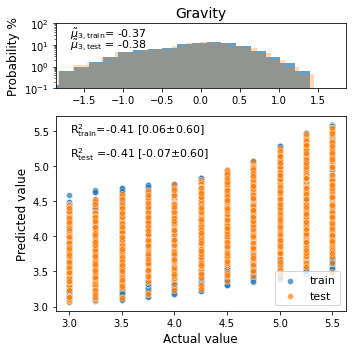

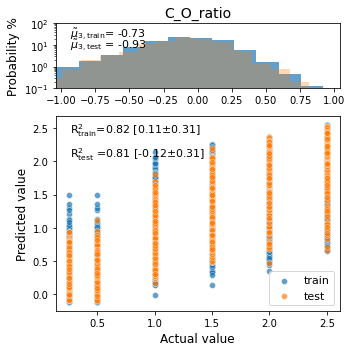

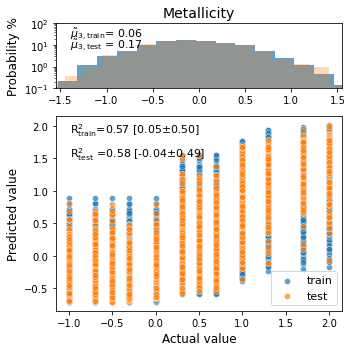

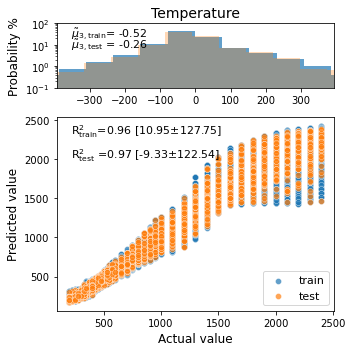

In [37]:
i = 1
regression_report(
        trained_model = train_cnn_model.trained_model,
        trained_data_processor = trained_Data_Processor,
        Xtrain = [trained_Data_Processor.X_train_standardized_rowwise[::i],
                  trained_Data_Processor.X_train_standardized_columnwise[::i]],
    
        Xtest  = [trained_Data_Processor.X_test_standardized_rowwise[::i], 
                  trained_Data_Processor.X_test_standardized_columnwise[::i]],
    
        ytrain = trained_Data_Processor.y_train_standardized_columnwise[::i],
    
        ytest  = trained_Data_Processor.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
#         print_results = False,        
                 )